<a href="https://colab.research.google.com/github/pragneshrana/Algo_Trial/blob/master/ANOVA_INTERPRETATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as ols
from sklearn import datasets ## imports datasets from scikit-learn
from statsmodels.stats.anova import anova_lm #ANOVA
data = datasets.load_boston() ## loads Boston dataset from datasets library 
 
###Scikit type to pandas
df = pd.DataFrame(data.data, columns=data.feature_names)
# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])
type(df)
print(df.columns)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


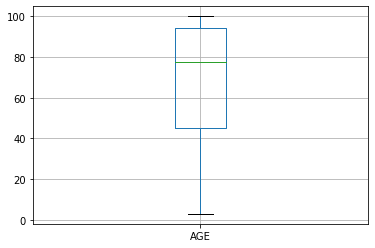

In [0]:
#Plotting box plots
df.boxplot('AGE')


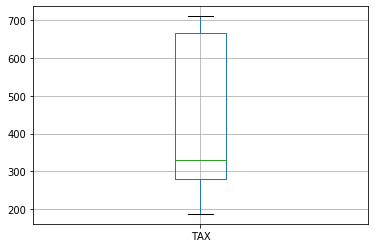

In [0]:
df.boxplot('TAX')

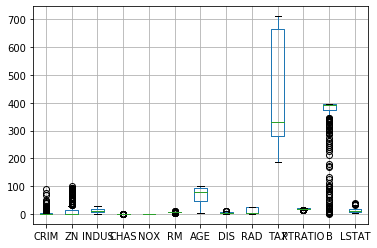

In [0]:
#All parameter box plot
df.boxplot()

In [0]:
## Without a constant

import statsmodels.api as sm

X = df["CRIM"]
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

error  = np.sum(np.square(np.abs(predictions - y)))
print(error)
# Print out the statistics
model.summary()

284620.15079262323


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.050
Model:                            OLS   Adj. R-squared (uncentered):              0.048
Method:                 Least Squares   F-statistic:                              26.63
Date:                Tue, 21 Jan 2020   Prob (F-statistic):                    3.56e-07
Time:                        16:15:25   Log-Likelihood:                         -2320.1
No. Observations:                 506   AIC:                                      4642.
Df Residuals:                     505   BIC:                                      4646.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM           0.5842      0.113      5.160      0.000       0.362       0.807
==============================================================================
Omnibus:                       67.016   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.479
Skew:                          -0.544   Prob(JB):                     2.47e-55
Kurtosis:                       6.278   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
## With a constant Multiple

import statsmodels.api as sm

##Adding constant 
print(list(df.columns))
ones = np.ones(len(df))

column_name =list(df.columns)
# column_name.remove('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM')
X = df[column_name]
X['const'] = ones
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 21 Jan 2020   Prob (F-statistic):          6.72e-135
Time:                        16:15:27   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
const         36.4595      5.103      7.144      0.000      26.432      46.487
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation : <br>
By minimizinng sum of square, best regression line is obtained. <br>
other if you change $Xi$ by one unit then dependent unit will get affected by $\beta_i$.  \beta_i$ also indicates the aveage expected change in the interval. Which also helps in interpretation of the confidence interval.<br>



Meaning of Intercept:<br>
Intercept is expected value of Y when all X=0. \
The model indicates 

The coefficent area obtained by least least square solution.


***STANDARD ERROR:*** \
Std error in coeffcient indiactes the samapling variation exist if resampaling and reestimation is done.
Indication of reliability of samples.


Examples: \
IF $\hat{\beta}$ = 1 \
If standard error $SE(\hat{\beta})$ is 0.2  then $\hat{\beta}$ is 5 standard error away from zero. means $\beta$ is not equal to zero and there is stastical realtionship between parameters. \


IF $\hat{\beta}$ = 1 \
If standard error $SE(\hat{\beta})$ is 2  then $\hat{\beta}$ is 0.5 standard error near to zero. means $\beta$ is equal to zero and there is no stastical realtionship between parameters. \


T-stastics: \
$t = \frac{\text{coef}}{\text{std err}}$ \

The t-test can be measure the relationship between the target variable and predictor variable.(For every predictor  variable individually). Addition significabnt parameter to the model makes it more effective.

Hypothesis: \
$H_0 = \beta_j = 0$ \
$H_1 = \beta_j \neq 0$ \

**larger value of the (either positive or negative) shows more importance of the parameter. Don't worry about Constant term.**

**What P value Tells?** \
It indcate how extreme the coefficent is in case population coefficient is zero. \
ot it gives probability of having coefficeint value by chance.

Here P value is obtained using Two way Two tailed test(regardless of the direction of the relationship you hypothesize, you are testing for the possibility of the relationship in both directions.) and T-table.

procedure : 
1. Take T value 
2. Fix  Significance Level (0.05)
3. DOF(n-1)
t-table is symmetric so, negative value doesn't matter 
QUCIK T : https://www.socscistatistics.com/pvalues/tdistribution.aspx
\

\

**Interval:**
Interval shows the critical bound for t-stastics, if t value fall in that bound you can't reject the null hypothesis.



$R^2 : $

$R^2 = \frac{\text{RSS after regression }}{\text{total RSS}}  = \frac{\text{Change of deviance }}{\text{RSS obtained by NULL model}}  $

It indiactes the percetage of variations in the responce variable that is explained by the model.

Total RSS is obtained by the $y = \alpha $ model which gives the predictor $\bar{y} = $ average values of Y or mean line or (expected value of given Y) <bR>



Adjusted $R^2$:

$R^2_{adj} = R^2 - \frac{k(1-R^2)}{n-k-1}$




#loglikelihood:

What is probaility distribution? \
Probability distrubtuion function is a mathematical fucntion that provide the probabilities of occurence of different possible outcomes in an experiment. \
1. PDF(Continoius)
2. PMF(Discreate)
3. CDF(BOth)

**PMF (Probability mass fucntion) or Frequency function**: \
Probability mass function (PMF) is frequncy function. It gives probability of discrete random variable.(Equation/Table/Graph).
or for discreate outcome it shows associated probabilities which sums to 1

** PDF (Probability density function) **:
PMF does not work for continious variable as for continious random variable P(X=x) =0 $\forall x \in \mathcal{R} $ \
Probability at specififc point is zero as area under curve is zero but rather than taking specific point, probability can be calculated in the small interval around that specific point which gives probability density at point. \

$f_X(x)= \lim_{\Delta \rightarrow 0^+} \frac{x < X \leq x+\Delta}{\Delta}$ \

PDF is limitiang case of PMF. When any experiment has infinitely many outcome then it's frquecy plot generates PDF plot.\

**CDF:** \
It gives cummulative probability associated with function or random variable. \

**What is likelihood? **\
To find out unkown parameter associated with distribution of the data.
or given a dataset choose the parameter of the model in such away that data are most likely.

**negative log likelihood** is obtained by followign method. \
$NLL(\theta) $ \
$= -\sum_{i=1}^{N} \log p(y_i|x_i,\theta)$ \
$= -\sum_{i=1}^{N} \log [(\frac{1}{2 \pi \sigma^2})^\frac{1}{2} \exp(-\frac{1}{2 \sigma^2}(y_i - \beta^T x_i)^2)]$ \
$= -\sum_{i=1}^{N} \frac{1}{2} \log(\frac{1}{2 \pi \sigma^2})- \frac{1}{2 \sigma^2} (y_i - \beta^T x_i)^2$ \
$= -\frac{N}{2} \log(\frac{1}{2 \pi \sigma^2})- \frac{1}{2 \sigma^2} (y_i - \beta^T x_i)^2$ \

**IN SHORT** \

$probability(data|distribution)$ \
$Lilelihood(distribution|data)$


#AIC: Akine's information criteria. 
AIC is useful for to compare the quality of the model.  \
$AIC = -2(loglikelihood) + 2K$ \
where K = Number odf parameter in the model,
**There are seveal advance version of AIC is avilable.** \

**Worst case :** If model is poor then by cpmnionation of parameter it will just give best out of worst.\

For generated model the AIC is , \
$x_1 $ = 265 \ #CANCEL
$x_2 $ = 30 \ #pick lowest AIC 
$x_3 $ = 400 \ #cancel
$x_4 $ = 40 \ #cancel

$x_1 + x_2 $ = 150 \  #cancel
$x_1 + x_3 $ = 300 \  #cancel
$x_1 + x_4 $ = 175 \  #cancel
$x_2 + x_3 $ = 25 \  #pick lowest AIC and Also select this as model
$x_2 + x_4 $ = 300 \  #cancel
$x_3 + x_4 $ = 300 \  #cancel

$x_1 + x_2 + x_3$ = 250 \ #cancel

**LOWEST AIC IS GOOD**

#BIC:  Bayesian Information Criterion / Schwarz Criterion

It is reaalated to AIC \
$BIC = -2(loglikelihood) + Klog(n)$ \
where, n = sample size






**Omnibus/Prob(Omnibus)** – Checks skewness and kurtosis of the residual. Value close to zero indicates normalcy. The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. \
Ideally Omnibus should be low and related probability should be high (near to enough) indicates data is somewhat normal, but not altogether ideal. \

for example, Prob(Omnibus) is 0.056, violates the OLS assumption. which shows that the coefficients estimated out of it are not Best Linear Unbiased Estimators.\
It means that model does not completely explain data. May be more featues are missing.**Breath and live life then**\ 

**Skew**– Ideal value of skew shold near to zero, indicates the **residual distribution is normal.** 

**Kurtosis**– a measure of peak or curvature of the data. High peaks means large Kurtosis.which shows tighter clustering of residuals around zero. Shows a better model having less outliers.

**Durbin-Watson**– It is tests for homoscedasticity(having the same scatter or different samples have the same variance, even if they came from different populations). Ideal value should be between 1 and 2. 

**Jarque-Bera (JB)/Prob(JB)** – It also measures skew and kurtosis. Just a confirmation of the Omnibus test.

** Condition Number** – shows the sensitivity of a function's output as compared to its input. It should relatively small number something below 30. 

In [0]:
# Peform analysis of variance on fitted linear model
listtt = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM']
dependent  = ''
for i in range(df.shape[1]):
  # if(df.columns[i] in listtt ):
  #   continue
  dependent += '+' + str(df.columns[i])

dependent = dependent[1:] #removing first char

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM 
final_data = X
final_data["MEDV"] = y
# # Fit the model
model = ols("MEDV ~ "+str(dependent)+"",final_data).fit()
anova_results= anova_lm(model)

print('\nANOVA results')
print(anova_results)



ANOVA results
             df        sum_sq       mean_sq           F        PR(>F)
CRIM        1.0   6440.783059   6440.783059  286.030046  6.454140e-51
ZN          1.0   3554.336197   3554.336197  157.845240  1.356741e-31
INDUS       1.0   2551.236435   2551.236435  113.298378  5.953713e-24
CHAS        1.0   1529.847881   1529.847881   67.939326  1.542886e-15
NOX         1.0     76.247648     76.247648    3.386097  6.635054e-02
RM          1.0  10938.116611  10938.116611  485.753048  2.156727e-75
AGE         1.0     90.267911     90.267911    4.008726  4.581372e-02
DIS         1.0   1779.501111   1779.501111   79.026227  1.163840e-17
RAD         1.0     34.134323     34.134323    1.515878  2.188325e-01
TAX         1.0    329.554069    329.554069   14.635234  1.472406e-04
PTRATIO     1.0   1309.309339   1309.309339   58.145385  1.266278e-13
B           1.0    593.337564    593.337564   26.349649  4.109280e-07
LSTAT       1.0   2410.838689   2410.838689  107.063426  7.776912e-23
Resid

ANOVA is a tool to check how much the residual variance is reduced by predictors in (nested regression) models, whereas the regression analysis aims to quantify effect sizes in terms of "how much is the response expected to change when the predictor(s) change by a given amount?".
ANOVA can be applied to any regression model (no matter if the model contains only continuous, only categorical, or both kinds of predictors). ANOVA allows to assess the impact of a predictor or a whole set of predictors on the residuals: who much of the variance in the data can be explained by these predictors? The regression analysis, on the other hand, is a complementary tool to asses the quantitative relation between a predictor and the response.

Analysis of variance (ANOVA):<br>
It analyse the varaince and tells any of the variable is significant or not. \

sum_sq  = $SS_{parameter}$ = which shows variance covered by each variable. \

$SS_{Residual}$ = Unexplained Residual by the model 

Total $SS_{Total} = 42716.26$ \
Total $SS_{parameter} = 31637.4755$


$R^2$ = 0.7406



Multiple Regression:<br>

let's take model $Y = \alpha + \beta_1 X_1 + \beta_1 X_2 +\beta_1 X_3 $<br>

1. $\alpha $ indicates change in value of Y obtained when All X's are zero.<br>
2. each $\beta$ parameter indicates the average change in Y that is asssociated with unit change in X while controlling the other explanatory variables.<br>
Besically effetc of each X's obtianed by comparing $X_i$ with it's nested model.

Ex: **Effect of $X_3$** can be obtained by Nested Models comparision,<br>
 $Y = \alpha + \beta_1 X_1 + \beta_1 X_2 +\beta_1 X_3 $<br>
 and 
<br>
 $Y = \alpha + \beta_1 X_1 + \beta_1 X_2 $
 It shows unique effect of $X_3$ obtained by comparing RSS or (deviance) when effect of $X_1$ and $X_2$ are accounted in the model.

 The **combined effect** of all the three parameters are obtaiend by comparing FULL model and NULL model.

 $Y = \alpha + \beta_1 X_1 + \beta_1 X_2 +\beta_1 X_3 $<br>
 and 
<br>
 $Y = \alpha$

 The significance of change can be assesed by calculations of F Stastics.


\

\

\


F Statistics: <br>
**(RSS - Statistics) or deviance**
F stastics is simply based on the deviacnes between the two models as fraction of the eviacne of the full model, whilst taking account of the number of parameters.

$F_{df_p,df_{p+q}} = \frac{RSS_p - RSS_{p+q}}{(df_p - df_p+q)-(RSS_{p+q}/df_{p+q})}$

where,

p model is for $y=\alpha$ <br>
q model is for $y=\alpha + \beta X $ <br>


For whole model:
$SSE_{parameter}$ = 31637.4755
Number of parameter = 13
$MSE_{parameter}$ = 31637.4755/13 =2433.65196154
$MSE_{Residual}$ = 11078.784/492 =22.517

$F_{model} = 2433.65196/22 =110.62 $
which same as the Result obtained from OLS.

$H_0 : all \space \beta_{i}=0$ \

$H_1 : all \space \beta_{i} \neq 0 $ 

F-Test: \
(constarined parameter, unconstrained parameter) = (13,492) \
Critical $F_{crit}$ value = 0.45 \
$F_{model} > F_{crit}$ \
so, reject the null hypothesis. \

Summary:
F test basically checks the significance of overall model in multiregression model. For F-statistic of full model it compares the full model with no predictor model or Intercept only model. 


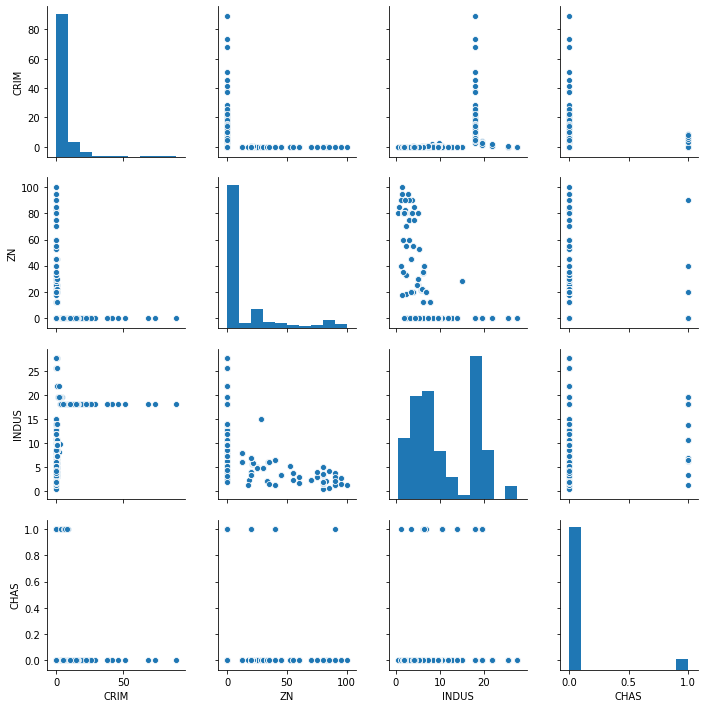

In [0]:
###Pairwise plot
import seaborn as sns
sns.pairplot(final_data.dropna(), vars = ['CRIM', 'ZN','INDUS', 'CHAS'])

#Explonatory Data Analysis 
It is to find out the pattern and realtionship or anolmalies to analysis. \
A pairwise plot allow us to distribution of single variable and relationship with other variable.  \


#VIF(Variation inflation factor) Analysis :
REF:(https://etav.github.io/python/vif_factor_python.html)

**If one variable is linear combination of combination of mroe than one variable**
Then Covariance matrix won't work.

The two variable contains similar information. It is said that they are highly colinear. Such Analysis can be easily done using covariance matrix.

Multicolinearity refers to the situation when two or more explanatory variables are highly linearly corealted(WIKI).

$VIF = \frac{1}{1-R^2}$ \

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone. VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

VIF = 1 Not correalated \
VIF < 5 Moderately correalated \
VIF > 5 Highly correlated \




In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif.round(1)

,VIF Factor,features
0,2.1,CRIM
1,2.8,ZN
2,14.5,INDUS
3,1.2,CHAS
4,73.9,NOX
5,77.9,RM
6,21.4,AGE
7,14.7,DIS
8,15.2,RAD
9,61.2,TAX
